In [2]:
import pandas as pd
data = pd.read_csv("результаты А_B - cookie_cats 2.csv", sep=",", encoding="utf-8")
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [3]:
data.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [6]:
data.groupby("version")["userid"].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

Text(0, 0.5, 'User Count')

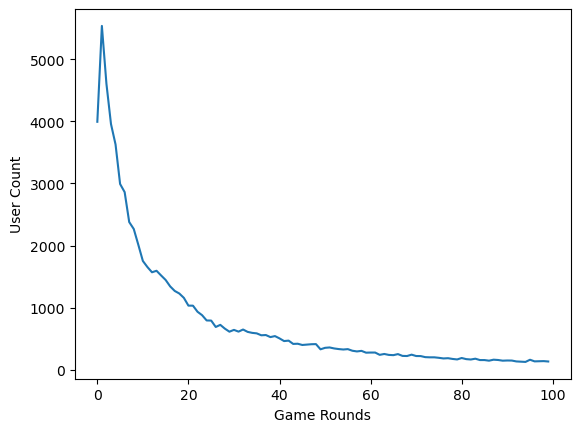

In [9]:
import matplotlib.pyplot as plt
plot_data = data.groupby('sum_gamerounds')['userid'].count()
ax = plot_data.head(n=100).plot(x="sum_gamerounds", y="userid")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

In [10]:
data['retention_1'].sum() / data['retention_1'].count()

0.4452095044850259

In [11]:
data['retention_1'].sum() / data['retention_1'].count()

data.groupby('version')['retention_1'].sum() / data.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

<Axes: ylabel='Density'>

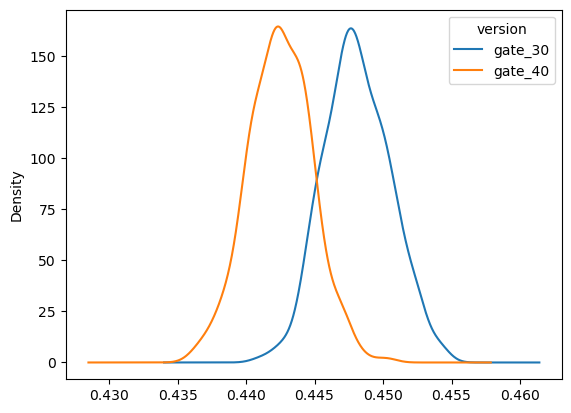

In [12]:
boot_1d = []
for i in range(500):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='kde')

Text(0.5, 0, '% difference in means')

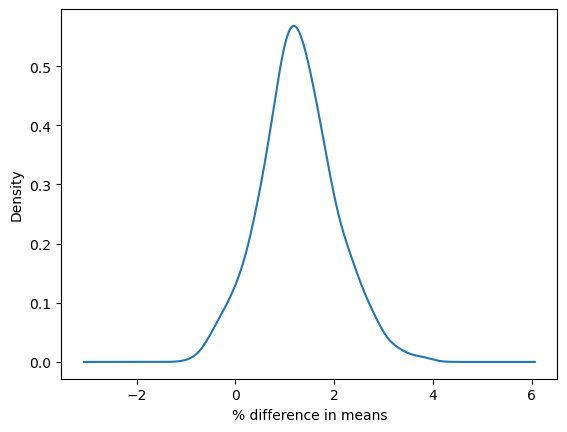

In [13]:
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) /  boot_1d['gate_40'] * 100

ax = boot_1d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

In [14]:
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d)
'{:.1%}'.format(prob)

'95.2%'

In [15]:
data.groupby('version')['retention_7'].sum() / data.groupby('version')['userid'].count()

version
gate_30    0.190201
gate_40    0.182000
dtype: float64

'100.0%'

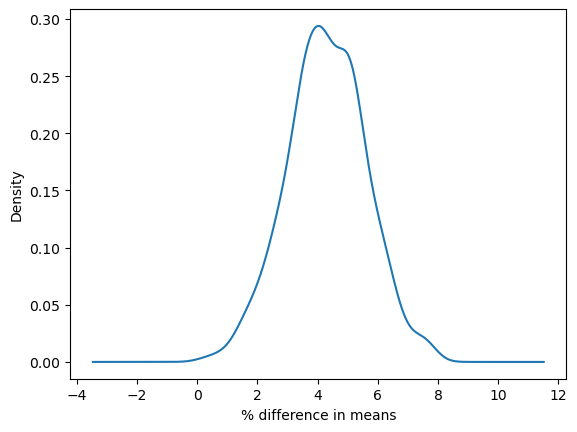

In [16]:
boot_7d = []
for i in range(500):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
boot_7d = pd.DataFrame(boot_7d)
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) /  boot_7d['gate_30'] * 100

ax = boot_7d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d)
'{:.1%}'.format(prob)

Вывод: Результат говорит нам о том, что 7-дневное удержание выше, когда уровень 30, чем в случае, когда уровень 40. Если мы хотим поддерживать высокий уровень вовлеченности игроков как 1-дневный, так и 7-дневный, то нам не следует перемещать игру с уровня 30 на уровень 40.